<a href="https://colab.research.google.com/github/serg-kas/NN-archive/blob/main/%D0%90%D0%BF%D1%80%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_2020_Light_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_18_%D0%A0%D0%B5%D0%BA%D1%83%D1%80%D1%80%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%B8_%D0%BE%D0%B4%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D1%8B%D0%B5_%D1%81%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ИМПОРТ БИБЛИОТЕК##

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import random

%matplotlib inline

from tensorflow.keras import utils # Для работы с категориальными данными

from tensorflow.keras.models import Sequential # Полносвязная модель
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation # Стандартные слои
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D # Сверточные слои
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional #Рекуррентные слои
from tensorflow.python.keras.optimizers import Adam, RMSprop #Алгоритмы обучения и оптимизации

from keras.preprocessing.text import Tokenizer, text_to_word_sequence #инструменты предобработки текста от кераса
from sklearn.model_selection import train_test_split #модуль для разбиения данных на обучающую и тестовую выборки

import os # Для работы с файлами
from google.colab import files #модуль для загрузки файлов в colab
from google.colab import drive # Для работы с Google Drive


#Light#

Используя шаблон ноутбука, напишите четыре нейронки для **распознавания писателей**.

Для этого выполните следующее:
1. Загрузите данные и разделите на слова.
2. Создайте словарь и превратите данные в индексы.
3. Превратите данные в обучающую выборку.
4. Напишите нейронные сети.

Четыре нейронки, которые нужно написать:
1. Embedding + Dense сеть.
2. Embedding + LSTM сеть.
3. Embedding + Conv1D сеть.
4. Embedding + сложная сеть из Dense, LSTM и Conv1D.

Для выполнения задания можно смотреть в ноутбук задания, но код желательно писать
своими руками, а не копировать.

## Загрузка данных


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Функция чтения файлов с гугл диска
def readText(fileName): 
  f = open(fileName, 'r')        
  text = f.read()                
  text = text.replace("\n", " ") #переносы строки в пробелы  
  return text                    #возвращает текст файла

# Загружаем тексты
trainText = []
trainText.append(readText('/content/drive/My Drive/my_sample_data/Д.З.18/Тексты писателей/(О. Генри) Обучающая_50 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/my_sample_data/Д.З.18/Тексты писателей/(Стругацкие) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/my_sample_data/Д.З.18/Тексты писателей/(Булгаков) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/my_sample_data/Д.З.18/Тексты писателей/(Клиффорд_Саймак) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/my_sample_data/Д.З.18/Тексты писателей/(Макс Фрай) Обучающая_5 вместе.txt'))
trainText.append(readText('/content/drive/My Drive/my_sample_data/Д.З.18/Тексты писателей/(Рэй Брэдберри) Обучающая_22 вместе.txt')) 


# Загружаем тестовые тексты
testText = []
testText.append(readText('/content/drive/My Drive/my_sample_data/Д.З.18/Тексты писателей/(О. Генри) Тестовая_20 вместе.txt'))
testText.append(readText('/content/drive/My Drive/my_sample_data/Д.З.18/Тексты писателей/(Стругацкие) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/my_sample_data/Д.З.18/Тексты писателей/(Булгаков) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/my_sample_data/Д.З.18/Тексты писателей/(Клиффорд_Саймак) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/my_sample_data/Д.З.18/Тексты писателей/(Макс Фрай) Тестовая_2 вместе.txt'))
testText.append(readText('/content/drive/My Drive/my_sample_data/Д.З.18/Тексты писателей/(Рэй Брэдберри) Тестовая_8 вместе.txt'))


# Объявляем интересующие нас классы (=писателей)
className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдбери"]
nClasses = len(className) #количество классов (=писателей)

## Обработка данных


In [ ]:
# Текстовые данные преобразуем в числовые (векторные)

maxWordsCount = 20000 # определяем макс.кол-во слов/индексов, учитываемое при обучении текстов

# функция Tokenizer для разбиения текста и превращения в матрицу числовых значений (словарь частотности слов)
tokenizer = Tokenizer(num_words=maxWordsCount, filters='–—!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\xa0–\ufeff', lower=True, split=' ', char_level=False, oov_token = 'unknown')

tokenizer.fit_on_texts(trainText) #обрабатываем тексты

items = list(tokenizer.word_index.items()) #вытаскиваем индексы слов для просмотра

In [ ]:
# Посмотрим что получилось в словаре
print("Размер словаря (уникальных слов)", len(items)) # Длина словаря
print(type(items[0])) #получился список кортежей
print(items[:20]) # Посмотрим 20 самых часто встречающихся слов
print("Интересующее слово имеет индекс: ", tokenizer.word_index[input("Уточните слово: ")]) #протестируем словарь частотности

Размер словаря (уникальных слов) 144054
<class 'tuple'>
[('unknown', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('что', 6), ('на', 7), ('с', 8), ('он', 9), ('а', 10), ('как', 11), ('то', 12), ('это', 13), ('но', 14), ('все', 15), ('у', 16), ('по', 17), ('его', 18), ('к', 19), ('так', 20)]
Уточните слово: гвардия
Интересующее слово имеет индекс:  8519


In [ ]:
# Преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText) # Обучающие тексты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)  # Проверочные тексты в индексы

print('Пример кодирования текста')
print('Оригинальный текст:              ', trainText[2][:65])
print('Текст кодированный по индексам: ', trainWordIndexes[2][:20], '\n')

Пример кодирования текста
Оригинальный текст:               ﻿Белая гвардия   Посвящается[1]  Любови Евгеньевне Белозерской[2]
Текст кодированный по индексам:  [3713, 8519, 1, 1482, 1, 1, 16627, 1538, 357, 8648, 1264, 2, 122, 15237, 1, 1, 700, 11926, 10480, 17259] 



In [ ]:
#Посчитаем статистику по текстам

print("Статистика по обучающим текстам:")

symbolsTrainText = 0 # символов в обучающих текстах
wordsTrainText = 0   # слов в обучающих текстах

for i in range(nClasses): # Проходим по всем классам
  print(className[i], " "*(10-len(className[i])), len(trainText[i]), "символов, ", len(trainWordIndexes[i]), "слов")
  symbolsTrainText += len(trainText[i]) # Считаем символы
  wordsTrainText += len(trainWordIndexes[i]) # Считаем слова 

print('----')
print("В сумме ", symbolsTrainText, " символов, ", wordsTrainText, " слов \n")
print()
print("Статистика по тестовым текстам:")

symbolsTestText = 0 # Объявляем переменную для подсчета символов в тестовых текстах
wordsTestText = 0 # Объявляем переменную для подсчета слов в тестовых текстах

for i in range(nClasses): #Проходим по всем классам
  print(className[i], ' '*(10-len(className[i])), len(testText[i]), "символов, ", len(testWordIndexes[i]), "слов")
  symbolsTestText += len(testText[i]) #Считаем символы
  wordsTestText += len(testWordIndexes[i]) #Считаем слова 
print('----')
print("В сумме ", symbolsTestText, " символов, ", wordsTestText, " слов")

Статистика по обучающим текстам:
О. Генри    1049517 символов,  160682 слов
Стругацкие  2042469 символов,  313405 слов
Булгаков    1765648 символов,  262109 слов
Саймак      1609507 символов,  251551 слов
Фрай        3700010 символов,  569052 слов
Брэдбери    1386454 символов,  214694 слов
----
В сумме  11553605  символов,  1771493  слов 


Статистика по тестовым текстам:
О. Генри    349662 символов,  53255 слов
Стругацкие  704846 символов,  108730 слов
Булгаков    875042 символов,  132910 слов
Саймак      318811 символов,  50362 слов
Фрай        1278191 символов,  196911 слов
Брэдбери    868673 символов,  132746 слов
----
В сумме  4395225  символов,  674914  слов


## Создание обучающей и проверочной выборки

In [ ]:
# Формирование обучающей и проверочной выборки 
# (определение функций)

# Разделение на короткие векторы
# Функция принимает последовательность индексов, размер окна, шаг окна
def getSetFromIndexes(wordIndexes, xLen, step): 
  xSample = [] # Объявляем переменную для векторов
  wordsLen = len(wordIndexes) # Считаем количество слов
  index = 0 # Задаем начальный индекс 

  while (index + xLen <= wordsLen):# Идём по всей длине вектора индексов
    xSample.append(wordIndexes[index:index+xLen]) # "Откусываем" векторы длины xLen
    index += step # Смещаеммся вперёд на step
    
  return xSample


# Функция принимает последовательность индексов, размер окна, шаг окна
def createSetsMultiClasses(wordIndexes, xLen, step): 

  # Для каждого из 6 классов
  # Создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) # Задаем количество классов выборки
  classesXSamples = []        # Здесь будет список размером "кол-во классов*кол-во окон в тексте*длину окна (например, 6 по 1341*1000)"
  for wI in wordIndexes:      # Для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) # Добавляем в список очередной текст индексов, разбитый на "кол-во окон*длину окна" 

  # Формируем один общий xSamples
  xSamples = [] # Здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна (например, 15779*1000)"
  ySamples = [] # Здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной 6"
  
  for t in range(nClasses): # В диапазоне кол-ва классов(6)
    xT = classesXSamples[t] # Берем очередной текст вида "кол-во окон в тексте*длину окна"(например, 1341*1000)
    for i in range(len(xT)): # И каждое его окно
      xSamples.append(xT[i]) # Добавляем в общий список выборки
      ySamples.append(utils.to_categorical(t, nClasses)) # Добавляем соответствующий вектор класса

  xSamples = np.array(xSamples) # Переводим в массив numpy для подачи в нейронку
  ySamples = np.array(ySamples) # Переводим в массив numpy для подачи в нейронку

  
  return (xSamples, ySamples) #Функция возвращает выборку и соответствующие векторы классов



In [ ]:
# Задаём базовые параметры
xLen = 1000 # Длина отрезка текста, по которой анализируем, в словах
step = 100 # Шаг разбиения исходного текста на обучающие вектора

In [ ]:
#Формируем обучающую и тестовую выборку
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) #извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    #извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)
#получили обучающий/тестовый набор, достаточный для запуска Embedding

(17658, 1000)
(17658, 6)
(6693, 1000)
(6693, 6)


## Распознавание проверочной выборки


In [ ]:
# Функции для распознавания проверочной выборки

def createTestMultiClasses(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна

  # Для каждого из 6 классов
  # Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) # задаем количество классов
  xTest6Classes01 = []               # здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 # здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:             # для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) # тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))       # переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) # трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     # и добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes # функция вернёт тестовые данные: TestBg 6 классов на n*20000 и xTestEm 6 по n*1000



# Расспознаём тестовую выборку и выводим результаты

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  for i in range(nClasses):
    # Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим cредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
  print()
  return sumVal/sumCount

xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step) # подгоним форму тестовых классов под функцию recognizeMultiClass

## Работа  с моделями сетей

**Embedding + Dense**

Epoch 1/20
89/89 [==============================] - 3s 38ms/step - loss: 2.8405 - accuracy: 0.5421 - val_loss: 6.6886 - val_accuracy: 0.1611
Epoch 2/20
89/89 [==============================] - 3s 36ms/step - loss: 0.4996 - accuracy: 0.9095 - val_loss: 7.7699 - val_accuracy: 0.2036
Epoch 3/20
89/89 [==============================] - 3s 36ms/step - loss: 0.3360 - accuracy: 0.9500 - val_loss: 19.2554 - val_accuracy: 0.1611
Epoch 4/20
89/89 [==============================] - 3s 36ms/step - loss: 0.2919 - accuracy: 0.9612 - val_loss: 6.1201 - val_accuracy: 0.3613
Epoch 5/20
89/89 [==============================] - 3s 36ms/step - loss: 0.2575 - accuracy: 0.9685 - val_loss: 32.0587 - val_accuracy: 0.1527
Epoch 6/20
89/89 [==============================] - 3s 36ms/step - loss: 0.2492 - accuracy: 0.9716 - val_loss: 18.9412 - val_accuracy: 0.4597
Epoch 7/20
89/89 [==============================] - 3s 36ms/step - loss: 0.2493 - accuracy: 0.9750 - val_loss: 8.9683 - val_accuracy: 0.4430
Epoch 8/20

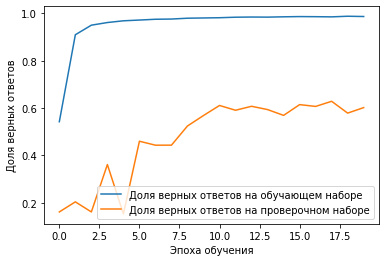

НЕЙРОНКА:  Embedding + Dense

О. Генри  распознано  63 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  распознано  52 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  45 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  распознано  43 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  распознано  76 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  распознано  61 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  60 %



In [ ]:
modelEL = Sequential() # создаём последовательную модель нейросети
# преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
modelEL.add(Embedding(maxWordsCount, 10, input_length=xLen))

modelEL.add(SpatialDropout1D(0.4)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения

modelEL.add(BatchNormalization()) # добавляем слой нормализации данных
modelEL.add(Dense(200, activation="relu")) # добавляем полносвязный слой с указанием количества нейронов и функции активации
modelEL.add(Dropout(0.5)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения
modelEL.add(BatchNormalization()) # добавляем слой нормализации данных
modelEL.add(Flatten()) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)
modelEL.add(Dense(6, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

# Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
modelEL.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть с указанием тренировочной выборки, количества эпох, размера минибатча для подачи сети, и тестовой выборки
history = modelEL.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTest, yTest))

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelEL, xTest6Classes, "Embedding + Dense") #функция покажет какие классы и как распознаны верно

In [ ]:
print(modelEC.summary()) # выведем на экран данные о модели

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 1000, 10)          200000    
_________________________________________________________________
spatial_dropout1d_12 (Spatia (None, 1000, 10)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 1000, 4)           240       
_________________________________________________________________
dense_18 (Dense)             (None, 1000, 100)         500       
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 996, 20)           10020     
_________________________________________________________________
lstm_13 (LSTM)               (None, 996, 4)            400       
_________________________________________________________________
dropout_20 (Dropout)         (None, 996, 4)          

**Embedding + LSTM**

Epoch 1/10
89/89 [==============================] - 5s 56ms/step - loss: 1.3526 - accuracy: 0.5241 - val_loss: 1.9106 - val_accuracy: 0.0738
Epoch 2/10
89/89 [==============================] - 5s 53ms/step - loss: 0.2785 - accuracy: 0.8973 - val_loss: 2.8850 - val_accuracy: 0.2954
Epoch 3/10
89/89 [==============================] - 5s 52ms/step - loss: 0.0887 - accuracy: 0.9686 - val_loss: 2.4246 - val_accuracy: 0.3069
Epoch 4/10
89/89 [==============================] - 5s 53ms/step - loss: 0.0650 - accuracy: 0.9782 - val_loss: 2.6622 - val_accuracy: 0.3342
Epoch 5/10
89/89 [==============================] - 5s 53ms/step - loss: 0.0499 - accuracy: 0.9838 - val_loss: 1.8386 - val_accuracy: 0.4814
Epoch 6/10
89/89 [==============================] - 5s 53ms/step - loss: 0.0431 - accuracy: 0.9858 - val_loss: 1.5087 - val_accuracy: 0.5690
Epoch 7/10
89/89 [==============================] - 5s 52ms/step - loss: 0.0395 - accuracy: 0.9871 - val_loss: 1.5805 - val_accuracy: 0.6106
Epoch 8/10
89

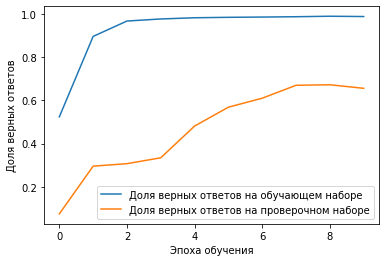

НЕЙРОНКА:  Embedding + LSTM

О. Генри  распознано  44 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  распознано  44 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  80 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  распознано  64 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  распознано  74 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  распознано  64 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  65 %



In [ ]:
modelEL = Sequential() # создаём последовательную модель нейросети
# преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
modelEL.add(Embedding(maxWordsCount, 10, input_length=xLen))

modelEL.add(SpatialDropout1D(0.4)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения
modelEL.add(BatchNormalization())  # добавляем слой нормализации данных
modelEL.add(LSTM(4, return_sequences=1)) # добавляем слой LSTM, совместимый с Cuda при поддержке GPU
modelEL.add(Dropout(0.5)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения

modelEL.add(BatchNormalization()) # добавляем слой нормализации данных
modelEL.add(Flatten()) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)
modelEL.add(Dense(6, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

# Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
modelEL.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть с указанием тренировочной выборки, количества эпох, размера минибатча для подачи сети, и тестовой выборки
history = modelEL.fit(xTrain, 
                    yTrain, 
                    epochs=10,
                    batch_size=200,
                    validation_data=(xTest, yTest))

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelEL, xTest6Classes, "Embedding + LSTM") #функция покажет какие классы и как распознаны верно

In [ ]:
print(modelEC.summary()) # выведем на экран данные о модели

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 1000, 10)          200000    
_________________________________________________________________
spatial_dropout1d_12 (Spatia (None, 1000, 10)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 1000, 4)           240       
_________________________________________________________________
dense_18 (Dense)             (None, 1000, 100)         500       
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 996, 20)           10020     
_________________________________________________________________
lstm_13 (LSTM)               (None, 996, 4)            400       
_________________________________________________________________
dropout_20 (Dropout)         (None, 996, 4)          

**Embedding + Conv1D**


Epoch 1/30
89/89 [==============================] - 2s 19ms/step - loss: 1.2810 - accuracy: 0.5389 - val_loss: 2.5328 - val_accuracy: 0.1611
Epoch 2/30
89/89 [==============================] - 2s 17ms/step - loss: 0.0906 - accuracy: 0.9715 - val_loss: 4.7797 - val_accuracy: 0.1611
Epoch 3/30
89/89 [==============================] - 2s 17ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 3.4941 - val_accuracy: 0.2403
Epoch 4/30
89/89 [==============================] - 2s 17ms/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 6.8355 - val_accuracy: 0.1611
Epoch 5/30
89/89 [==============================] - 2s 17ms/step - loss: 0.0094 - accuracy: 0.9966 - val_loss: 5.6633 - val_accuracy: 0.1832
Epoch 6/30
89/89 [==============================] - 2s 17ms/step - loss: 0.0094 - accuracy: 0.9967 - val_loss: 2.3325 - val_accuracy: 0.5059
Epoch 7/30
89/89 [==============================] - 2s 17ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 1.3979 - val_accuracy: 0.6638
Epoch 8/30
89

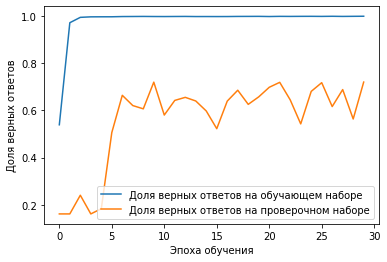

НЕЙРОНКА:  Embedding + Conv1D

О. Генри  распознано  72 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  распознано  47 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  68 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  распознано  78 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  распознано  80 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  распознано  80 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  71 %



In [ ]:
modelEC = Sequential() # создаём последовательную модель нейросети
# преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
modelEC.add(Embedding(maxWordsCount, 10, input_length=xLen))

modelEC.add(SpatialDropout1D(0.2)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения

modelEC.add(BatchNormalization())  # добавляем слой нормализации данных
modelEC.add(Conv1D(20, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
modelEC.add(MaxPooling1D(2)) # добавляем слой подвыборки/пулинга с функцией максимума

modelEC.add(Conv1D(20, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
modelEC.add(MaxPooling1D(2)) # добавляем слой подвыборки/пулинга с функцией максимума
modelEC.add(Dropout(0.2)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения

modelEC.add(BatchNormalization()) # добавляем слой нормализации данных
modelEC.add(Flatten()) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)
modelEC.add(Dense(6, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

# Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
modelEC.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть с указанием тренировочной выборки, количества эпох, размера минибатча для подачи сети, и тестовой выборки
history = modelEC.fit(xTrain, 
                    yTrain, 
                    epochs=30,
                    batch_size=200,
                    validation_data=(xTest, yTest))

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelEC, xTest6Classes, "Embedding + Conv1D") #функция покажет какие классы и как распознаны верно

In [ ]:
print(modelEC.summary()) # выведем на экран данные о модели

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 1000, 10)          200000    
_________________________________________________________________
spatial_dropout1d_23 (Spatia (None, 1000, 10)          0         
_________________________________________________________________
batch_normalization_51 (Batc (None, 1000, 10)          40        
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 996, 20)           1020      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 498, 20)           0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 494, 20)           2020      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 247, 20)         

**Embedding + сложная сеть из Dense, LSTM и Conv1D**

Epoch 1/10
89/89 [==============================] - 9s 102ms/step - loss: 0.5752 - accuracy: 0.7659 - val_loss: 2.6328 - val_accuracy: 0.1638
Epoch 2/10
89/89 [==============================] - 8s 91ms/step - loss: 0.0430 - accuracy: 0.9865 - val_loss: 4.2382 - val_accuracy: 0.1611
Epoch 3/10
89/89 [==============================] - 8s 90ms/step - loss: 0.0213 - accuracy: 0.9926 - val_loss: 5.3294 - val_accuracy: 0.2633
Epoch 4/10
89/89 [==============================] - 8s 93ms/step - loss: 0.0166 - accuracy: 0.9948 - val_loss: 2.2240 - val_accuracy: 0.3853
Epoch 5/10
89/89 [==============================] - 9s 96ms/step - loss: 0.0146 - accuracy: 0.9950 - val_loss: 10.5051 - val_accuracy: 0.2606
Epoch 6/10
89/89 [==============================] - 9s 96ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 6.2832 - val_accuracy: 0.3961
Epoch 7/10
89/89 [==============================] - 9s 96ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 5.4730 - val_accuracy: 0.3223
Epoch 8/10


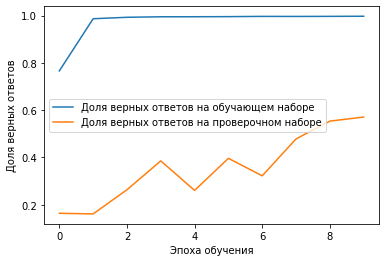

НЕЙРОНКА:  Embedding + сложная сеть из Dense, LSTM и Conv1D

О. Генри  распознано  19 % сеть считает, что это  Брэдбери ,  распознано НЕ ВЕРНО!
Стругацкие  распознано  59 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  69 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  распознано  73 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  распознано  69 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  распознано  32 % сеть считает, что это  Саймак ,  распознано НЕ ВЕРНО!

Средний процент распознавания  57 %



In [ ]:
modelEC = Sequential() # создаём последовательную модель нейросети
# преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
modelEC.add(Embedding(maxWordsCount, 10, input_length=xLen))

modelEC.add(SpatialDropout1D(0.2)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения

modelEC.add(LSTM(4, return_sequences=1)) # добавляем слой LSTM, совместимый с Cuda при поддержке GPU

modelEC.add(Dense(100, activation='relu')) # добавляем полносвязный слой с указанием количества нейронов и функции активации
modelEC.add(Dropout(0.4)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения

modelEC.add(Conv1D(20, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
modelEC.add(MaxPooling1D(2)) # добавляем слой подвыборки/пулинга с функцией максимума

modelEC.add(LSTM(4, return_sequences=1)) # добавляем слой LSTM, совместимый с Cuda при поддержке GPU

modelEC.add(Conv1D(20, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
modelEC.add(Conv1D(20, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров
modelEC.add(MaxPooling1D(2)) # добавляем слой подвыборки/пулинга с функцией максимума
modelEC.add(Dropout(0.2)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения

modelEC.add(BatchNormalization()) # добавляем слой нормализации данных
modelEC.add(Flatten()) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)
modelEC.add(Dense(6, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

# Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
modelEC.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть с указанием тренировочной выборки, количества эпох, размера минибатча для подачи сети, и тестовой выборки
history = modelEC.fit(xTrain, 
                    yTrain, 
                    epochs=10,
                    batch_size=200,
                    validation_data=(xTest, yTest))

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelEC, xTest6Classes, "Embedding + сложная сеть из Dense, LSTM и Conv1D") #функция покажет какие классы и как распознаны верно

In [ ]:
print(modelEC.summary()) # выведем на экран данные о модели

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 1000, 10)          200000    
_________________________________________________________________
spatial_dropout1d_31 (Spatia (None, 1000, 10)          0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 1000, 4)           240       
_________________________________________________________________
dense_51 (Dense)             (None, 1000, 100)         500       
_________________________________________________________________
dropout_48 (Dropout)         (None, 1000, 100)         0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 996, 20)           10020     
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 498, 20)         

**Итоги:** 

Название модели / Точность на пров.выборке / Точность по писателям

Embedding + Dense / 60% / 60%

Embedding + LTSM / 65% / 65%

Embedding + Conv1D / 72% / 71%  

Embedding+Dense+LSTM+Conv1D / 57% / 57% 

Перспективными для улучшения кажутся модели Embedding+LTSM  и Embedding+Conv1D.






#PRO# 

**Вариант 1**

Напишите классификацию заболеваний по базе симптомов, используя любые подходы,
связанные с обработкой текстов.
1. Embedding + LSTM сеть.
2. Embedding + Conv1D сеть.
3. Embedding + сложная сеть из Dense, LSTM и Conv1D.

Добейтесь максимальной точности распознавания.
Используйте xLen = 50.

In [ ]:
# Загружаем данные и приступаем к их обработке

drive.mount('/content/drive') #подключаем google drive 

!rm -R /content/diseases  #если уже есть папка deseases то удаляем ее

# Указываем путь к базе в Google Drive, создаем папку texts и извлекаем туда базу
!unzip -q '/content/drive/My Drive/my_sample_data/Д.З.18/Болезни.zip' -d /content/diseases 

#print('\n', os.listdir('diseases/Болезни'))

Mounted at /content/drive
rm: cannot remove '/content/diseases': No such file or directory


In [ ]:
className = os.listdir('diseases/Болезни')    # Классы болезней = список файлов из папки
nClasses = len(className) # Количество классов (=болезней)

# Избавимся от .txt названиях классов
for i in range(nClasses):
  className[i] = className[i][0:-4]
  #print(i, className[i])

print(className)
print(nClasses)

['Дуоденит', 'Гастрит', 'Колит', 'Энтерит', 'Гепатит', 'Панкреатит', 'Язва', 'Холицестит', 'Эзофагит', 'Аппендицит']
10


In [ ]:
# Функция для чтения файла. 

def readText(fileName):          # На вход отправляем путь к файлу
  f = open(fileName, 'r')        # Задаем открытие нужного файла в режиме чтения
  text = f.read()                # Читаем текст
  text = text.replace("\n", " ") # Переносы строки переводим в пробелы
  
  return text                    # Возвращаем текст файла


In [ ]:
#Загружаем тексты

trainText = [] #пустой список обучающие тексты
testText = []  #пустой список тестовые тексты
 
#Класс каждого i-ого эллемента в обучающей выборке будет соответствовать 
#классу каждого i-ого эллемента в тестовой выборке

# Цикл по классам
for i in className:
  # Цикл по  файлам в папке
  for j in os.listdir('diseases/Болезни/'):
    if i in j:
      fileText = readText('diseases/Болезни/' + j) #текст из файла
      print('Обрабатывается файл', j,'длиной', len(fileText), 'символов')

      # Разбиваем текст из файла на обучающую и проверочную выборку
      # 20% текста, начинающиеся с произвольного места, пойдут в проверочную выборку
      # остальные 80% текста пойдут обучающую выборку

      # Делим по целым словам чтобы не портить текст.
      # Сделаем список слов разделением по пробелам
      tempText = fileText.split(' ')
      # a и b - случайные границы интервала 20% 
      a = random.randint(0, round(0.8*len(tempText)))
      b = a + round(0.2*len(tempText))
      # при добавлении объединяем список слов обратно в сплошную строку
      trainText.append(' '.join(tempText[:a] + tempText[b:])) #добавляем в обучающую выборку
      testText.append(' '.join(tempText[a:b])) #добавляем в тестовую выборку
      

print()
print('Количество элементов в trainText', len(trainText))  
print('Количество элементов в testText', len(testText)) 

Обрабатывается файл Дуоденит.txt длиной 3941 символов
Обрабатывается файл Гастрит.txt длиной 6717 символов
Обрабатывается файл Колит.txt длиной 9127 символов
Обрабатывается файл Энтерит.txt длиной 6383 символов
Обрабатывается файл Гепатит.txt длиной 5523 символов
Обрабатывается файл Панкреатит.txt длиной 11313 символов
Обрабатывается файл Язва.txt длиной 3460 символов
Обрабатывается файл Холицестит.txt длиной 6157 символов
Обрабатывается файл Эзофагит.txt длиной 5867 символов
Обрабатывается файл Аппендицит.txt длиной 4075 символов

Количество элементов в trainText 10
Количество элементов в testText 10


In [ ]:
# Текстовые данные преобразуем в числовые (векторные)

maxWordsCount = 1000 # определяем макс.кол-во слов/индексов, учитываемое при обучении текстов

# функция Tokenizer для разбиения текста и превращения в матрицу числовых значений (словарь частотности слов)
tokenizer = Tokenizer(num_words=maxWordsCount, filters='–—!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\xa0–\ufeff', lower=True, split=' ', char_level=False, oov_token = 'unknown')

tokenizer.fit_on_texts(trainText) #обрабатываем тексты

items = list(tokenizer.word_index.items()) #вытаскиваем индексы слов для просмотра

In [ ]:
# Посмотрим что получилось в словаре
print("Размер словаря (уникальных слов)", len(items)) # Длина словаря
print(type(items[0])) #получился список кортежей
print(items[:20]) # Посмотрим 20 самых часто встречающихся слов
print("Интересующее слово имеет индекс: ", tokenizer.word_index[input("Уточните слово: ")]) #протестируем словарь частотности

Размер словаря (уникальных слов) 1749
<class 'tuple'>
[('unknown', 1), ('в', 2), ('и', 3), ('боль', 4), ('боли', 5), ('или', 6), ('тошнота', 7), ('рвота', 8), ('живота', 9), ('животе', 10), ('области', 11), ('при', 12), ('отрыжка', 13), ('после', 14), ('слабость', 15), ('во', 16), ('с', 17), ('аппетита', 18), ('тела', 19), ('изжога', 20)]
Уточните слово: слабость
Интересующее слово имеет индекс:  15


In [ ]:
# Преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText) # Обучающие тексты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)  # Проверочные тексты в индексы

print('Пример кодирования текста')
print('Оригинальный текст:              ', trainText[2][:72])
print('Текст кодированный по индексам: ', trainWordIndexes[2][:9], '\n')

Пример кодирования текста
Оригинальный текст:               постоянные позывы на дефекацию, урчание, вздутие живота, профузный понос
Текст кодированный по индексам:  [373, 64, 30, 184, 46, 26, 9, 838, 53] 



In [ ]:
#Посчитаем статистику по текстам

print("Статистика по обучающим текстам:")

symbolsTrainText = 0 # символов в обучающих текстах
wordsTrainText = 0   # слов в обучающих текстах

for i in range(nClasses): # Проходим по всем классам
  print(className[i], " "*(10-len(className[i])), len(trainText[i]), "символов, ", len(trainWordIndexes[i]), "слов")
  symbolsTrainText += len(trainText[i]) # Считаем символы
  wordsTrainText += len(trainWordIndexes[i]) # Считаем слова 

print('----')
print("В сумме ", symbolsTrainText, " символов, ", wordsTrainText, " слов \n")
print()
print("Статистика по тестовым текстам:")

symbolsTestText = 0 # Объявляем переменную для подсчета символов в тестовых текстах
wordsTestText = 0 # Объявляем переменную для подсчета слов в тестовых текстах

for i in range(nClasses): #Проходим по всем классам
  print(className[i], ' '*(10-len(className[i])), len(testText[i]), "символов, ", len(testWordIndexes[i]), "слов")
  symbolsTestText += len(testText[i]) #Считаем символы
  wordsTestText += len(testWordIndexes[i]) #Считаем слова 
print('----')
print("В сумме ", symbolsTestText, " символов, ", wordsTestText, " слов")

Статистика по обучающим текстам:
Дуоденит    3187 символов,  390 слов
Гастрит     5353 символов,  680 слов
Колит       7352 символов,  958 слов
Энтерит     5048 символов,  658 слов
Гепатит     4472 символов,  552 слов
Панкреатит  8958 символов,  1183 слов
Язва        2760 символов,  378 слов
Холицестит  4879 символов,  670 слов
Эзофагит    4684 символов,  632 слов
Аппендицит  3269 символов,  464 слов
----
В сумме  49962  символов,  6565  слов 


Статистика по тестовым текстам:
Дуоденит    753 символов,  98 слов
Гастрит     1363 символов,  159 слов
Колит       1774 символов,  234 слов
Энтерит     1334 символов,  170 слов
Гепатит     1050 символов,  135 слов
Панкреатит  2354 символов,  297 слов
Язва        699 символов,  94 слов
Холицестит  1277 символов,  171 слов
Эзофагит    1182 символов,  161 слов
Аппендицит  805 символов,  115 слов
----
В сумме  12591  символов,  1634  слов


In [ ]:
# Формирование обучающей и проверочной выборки 
# (определение функций)

# Разделение на короткие векторы
# Функция принимает последовательность индексов, размер окна, шаг окна
def getSetFromIndexes(wordIndexes, xLen, step): 
  xSample = [] # Объявляем переменную для векторов
  wordsLen = len(wordIndexes) # Считаем количество слов
  index = 0 # Задаем начальный индекс 

  while (index + xLen <= wordsLen):# Идём по всей длине вектора индексов
    xSample.append(wordIndexes[index:index+xLen]) # "Откусываем" векторы длины xLen
    index += step # Смещаеммся вперёд на step
    
  return xSample


# Функция принимает последовательность индексов, размер окна, шаг окна
def createSetsMultiClasses(wordIndexes, xLen, step): 

  # Для каждого из 6 классов
  # Создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) # Задаем количество классов выборки
  classesXSamples = []        # Здесь будет список размером "кол-во классов*кол-во окон в тексте*длину окна (например, 6 по 1341*1000)"
  for wI in wordIndexes:      # Для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) # Добавляем в список очередной текст индексов, разбитый на "кол-во окон*длину окна" 

  # Формируем один общий xSamples
  xSamples = [] # Здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна (например, 15779*1000)"
  ySamples = [] # Здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной 6"
  
  for t in range(nClasses): # В диапазоне кол-ва классов(6)
    xT = classesXSamples[t] # Берем очередной текст вида "кол-во окон в тексте*длину окна"(например, 1341*1000)
    for i in range(len(xT)): # И каждое его окно
      xSamples.append(xT[i]) # Добавляем в общий список выборки
      ySamples.append(utils.to_categorical(t, nClasses)) # Добавляем соответствующий вектор класса

  xSamples = np.array(xSamples) # Переводим в массив numpy для подачи в нейронку
  ySamples = np.array(ySamples) # Переводим в массив numpy для подачи в нейронку

  
  return (xSamples, ySamples) #Функция возвращает выборку и соответствующие векторы классов


In [ ]:
# Задаём базовые параметры

# xLen=50 по условию задачи (в "распознавании писателей" было и 1000 и 5000)
# step уменьшил со 100 до 5 ввиду малости выборки

xLen = 50 # Длина отрезка текста, по которой анализируем, в словах
step = 5 # Шаг разбиения исходного текста на обучающие вектора

In [ ]:
#Формируем обучающую и тестовую выборку
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) #извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    #извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)
#получили обучающий/тестовый набор, достаточный для запуска Embedding

(1219, 50)
(1219, 10)
(233, 50)
(233, 10)


In [ ]:
# Функции для распознавания проверочной выборки

def createTestMultiClasses(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна

  # Для каждого из классов
  # Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) # задаем количество классов
  xTest6Classes01 = []               # здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 # здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:             # для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) # тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))       # переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) # трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     # и добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes # функция вернёт тестовые данные: TestBg 6 классов на n*20000 и xTestEm 6 по n*1000



# Расспознаём тестовую выборку и выводим результаты

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  for i in range(nClasses):
    # Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим cредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
  print()
  return sumVal/sumCount

xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step) # подгоним форму тестовых классов под функцию recognizeMultiClass

**Embedding + LSTM**

Epoch 1/10
244/244 [==============================] - 3s 12ms/step - loss: 2.5410 - accuracy: 0.2190 - val_loss: 2.1178 - val_accuracy: 0.2532
Epoch 2/10
244/244 [==============================] - 2s 9ms/step - loss: 1.6597 - accuracy: 0.4504 - val_loss: 1.4772 - val_accuracy: 0.5107
Epoch 3/10
244/244 [==============================] - 2s 9ms/step - loss: 1.1390 - accuracy: 0.6120 - val_loss: 1.1856 - val_accuracy: 0.5794
Epoch 4/10
244/244 [==============================] - 2s 9ms/step - loss: 0.9398 - accuracy: 0.6866 - val_loss: 1.1786 - val_accuracy: 0.6438
Epoch 5/10
244/244 [==============================] - 2s 9ms/step - loss: 0.6325 - accuracy: 0.7957 - val_loss: 1.4970 - val_accuracy: 0.5923
Epoch 6/10
244/244 [==============================] - 2s 9ms/step - loss: 0.5362 - accuracy: 0.8261 - val_loss: 1.1176 - val_accuracy: 0.6266
Epoch 7/10
244/244 [==============================] - 2s 9ms/step - loss: 0.4362 - accuracy: 0.8622 - val_loss: 0.9949 - val_accuracy: 0.7124
Epoch

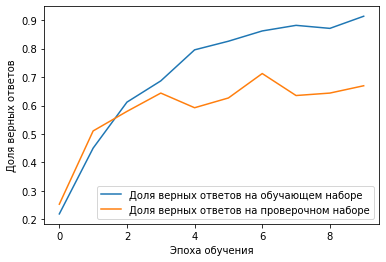

НЕЙРОНКА:  Embedding + LSTM

Дуоденит  распознано  40 % сеть считает, что это  Дуоденит ,  распознано ВЕРНО!
Гастрит  распознано  59 % сеть считает, что это  Гастрит ,  распознано ВЕРНО!
Колит  распознано  48 % сеть считает, что это  Колит ,  распознано ВЕРНО!
Энтерит  распознано  16 % сеть считает, что это  Панкреатит ,  распознано НЕ ВЕРНО!
Гепатит  распознано  72 % сеть считает, что это  Гепатит ,  распознано ВЕРНО!
Панкреатит  распознано  94 % сеть считает, что это  Панкреатит ,  распознано ВЕРНО!
Язва  распознано  88 % сеть считает, что это  Язва ,  распознано ВЕРНО!
Холицестит  распознано  72 % сеть считает, что это  Холицестит ,  распознано ВЕРНО!
Эзофагит  распознано  73 % сеть считает, что это  Эзофагит ,  распознано ВЕРНО!
Аппендицит  распознано  100 % сеть считает, что это  Аппендицит ,  распознано ВЕРНО!

Средний процент распознавания  66 %



In [ ]:
modelEL = Sequential() # создаём последовательную модель нейросети
# преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
modelEL.add(Embedding(maxWordsCount, 15, input_length=xLen))

modelEL.add(SpatialDropout1D(0.4)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения
modelEL.add(BatchNormalization())  # добавляем слой нормализации данных
modelEL.add(LSTM(12, return_sequences=1)) # добавляем слой LSTM, совместимый с Cuda при поддержке GPU
modelEL.add(Dropout(0.5)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения

modelEL.add(BatchNormalization()) # добавляем слой нормализации данных
modelEL.add(Flatten()) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)
modelEL.add(Dense(10, activation='softmax')) # добавляем полносвязный слой на 10 нейронов, с функцией активации softmax на выходном слое

# Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
modelEL.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть с указанием тренировочной выборки, количества эпох, размера минибатча для подачи сети, и тестовой выборки
history = modelEL.fit(xTrain, 
                    yTrain, 
                    epochs=10,
                    batch_size=5,
                    validation_data=(xTest, yTest))

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelEL, xTest6Classes, "Embedding + LSTM") #функция покажет какие классы и как распознаны верно

**Embedding + Conv1D**

Epoch 1/12
122/122 [==============================] - 1s 9ms/step - loss: 2.5298 - accuracy: 0.1764 - val_loss: 2.2901 - val_accuracy: 0.1159
Epoch 2/12
122/122 [==============================] - 1s 7ms/step - loss: 1.8610 - accuracy: 0.3495 - val_loss: 2.4972 - val_accuracy: 0.1073
Epoch 3/12
122/122 [==============================] - 1s 7ms/step - loss: 1.3805 - accuracy: 0.5012 - val_loss: 2.4610 - val_accuracy: 0.1502
Epoch 4/12
122/122 [==============================] - 1s 7ms/step - loss: 0.8801 - accuracy: 0.7178 - val_loss: 1.8370 - val_accuracy: 0.4421
Epoch 5/12
122/122 [==============================] - 1s 7ms/step - loss: 0.6128 - accuracy: 0.7859 - val_loss: 1.3318 - val_accuracy: 0.5794
Epoch 6/12
122/122 [==============================] - 1s 7ms/step - loss: 0.4632 - accuracy: 0.8540 - val_loss: 1.3378 - val_accuracy: 0.5880
Epoch 7/12
122/122 [==============================] - 1s 7ms/step - loss: 0.3278 - accuracy: 0.8942 - val_loss: 1.5271 - val_accuracy: 0.5751
Epoch 

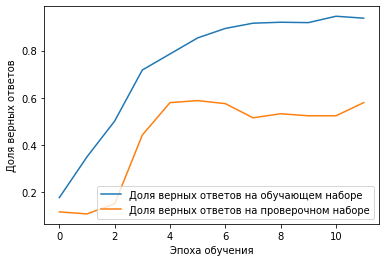

НЕЙРОНКА:  Embedding + Conv1D

Дуоденит  распознано  60 % сеть считает, что это  Дуоденит ,  распознано ВЕРНО!
Гастрит  распознано  68 % сеть считает, что это  Гастрит ,  распознано ВЕРНО!
Колит  распознано  48 % сеть считает, что это  Колит ,  распознано ВЕРНО!
Энтерит  распознано  28 % сеть считает, что это  Панкреатит ,  распознано НЕ ВЕРНО!
Гепатит  распознано  72 % сеть считает, что это  Гепатит ,  распознано ВЕРНО!
Панкреатит  распознано  98 % сеть считает, что это  Панкреатит ,  распознано ВЕРНО!
Язва  распознано  100 % сеть считает, что это  Язва ,  распознано ВЕРНО!
Холицестит  распознано  12 % сеть считает, что это  Панкреатит ,  распознано НЕ ВЕРНО!
Эзофагит  распознано  56 % сеть считает, что это  Эзофагит ,  распознано ВЕРНО!
Аппендицит  распознано  14 % сеть считает, что это  Панкреатит ,  распознано НЕ ВЕРНО!

Средний процент распознавания  57 %



In [ ]:
modelEC = Sequential() # создаём последовательную модель нейросети
# преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
modelEC.add(Embedding(maxWordsCount, 15, input_length=xLen))

modelEC.add(SpatialDropout1D(0.4)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения

modelEC.add(BatchNormalization())  # добавляем слой нормализации данных
modelEC.add(Conv1D(40, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
modelEC.add(MaxPooling1D(2)) # добавляем слой подвыборки/пулинга с функцией максимума

modelEC.add(Conv1D(40, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
modelEC.add(MaxPooling1D(2)) # добавляем слой подвыборки/пулинга с функцией максимума
modelEC.add(Dropout(0.2)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения

modelEC.add(BatchNormalization()) # добавляем слой нормализации данных
modelEC.add(Flatten()) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)
modelEC.add(Dense(10, activation='softmax')) # добавляем полносвязный слой на 10 нейронов, с функцией активации softmax на выходном слое

# Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
modelEC.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть с указанием тренировочной выборки, количества эпох, размера минибатча для подачи сети, и тестовой выборки
history = modelEC.fit(xTrain, 
                    yTrain, 
                    epochs=12,
                    batch_size=10,
                    validation_data=(xTest, yTest))

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelEC, xTest6Classes, "Embedding + Conv1D") #функция покажет какие классы и как распознаны верно

**Embedding + сложная сеть из Dense, LSTM и Conv1D**

Epoch 1/50
82/82 [==============================] - 2s 25ms/step - loss: 2.0185 - accuracy: 0.2461 - val_loss: 2.2072 - val_accuracy: 0.2704
Epoch 2/50
82/82 [==============================] - 1s 13ms/step - loss: 1.3831 - accuracy: 0.4742 - val_loss: 2.1391 - val_accuracy: 0.2575
Epoch 3/50
82/82 [==============================] - 1s 14ms/step - loss: 1.0452 - accuracy: 0.6038 - val_loss: 1.9964 - val_accuracy: 0.2704
Epoch 4/50
82/82 [==============================] - 1s 13ms/step - loss: 0.8209 - accuracy: 0.7088 - val_loss: 1.9628 - val_accuracy: 0.3433
Epoch 5/50
82/82 [==============================] - 1s 13ms/step - loss: 0.6749 - accuracy: 0.7572 - val_loss: 2.0325 - val_accuracy: 0.3433
Epoch 6/50
82/82 [==============================] - 1s 14ms/step - loss: 0.5375 - accuracy: 0.8023 - val_loss: 2.8397 - val_accuracy: 0.2403
Epoch 7/50
82/82 [==============================] - 1s 14ms/step - loss: 0.4430 - accuracy: 0.8499 - val_loss: 2.5943 - val_accuracy: 0.2661
Epoch 8/50
82

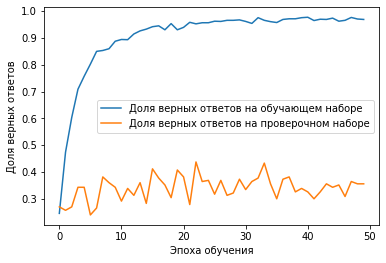

НЕЙРОНКА:  Embedding + сложная сеть из Dense, LSTM и Conv1D

Дуоденит  распознано  30 % сеть считает, что это  Энтерит ,  распознано НЕ ВЕРНО!
Гастрит  распознано  50 % сеть считает, что это  Гастрит ,  распознано ВЕРНО!
Колит  распознано  18 % сеть считает, что это  Эзофагит ,  распознано НЕ ВЕРНО!
Энтерит  распознано  0 % сеть считает, что это  Панкреатит ,  распознано НЕ ВЕРНО!
Гепатит  распознано  11 % сеть считает, что это  Язва ,  распознано НЕ ВЕРНО!
Панкреатит  распознано  74 % сеть считает, что это  Панкреатит ,  распознано ВЕРНО!
Язва  распознано  33 % сеть считает, что это  Энтерит ,  распознано НЕ ВЕРНО!
Холицестит  распознано  16 % сеть считает, что это  Панкреатит ,  распознано НЕ ВЕРНО!
Эзофагит  распознано  47 % сеть считает, что это  Панкреатит ,  распознано НЕ ВЕРНО!
Аппендицит  распознано  35 % сеть считает, что это  Эзофагит ,  распознано НЕ ВЕРНО!

Средний процент распознавания  35 %



In [ ]:
modelEC = Sequential() # создаём последовательную модель нейросети
# преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
modelEC.add(Embedding(maxWordsCount, 15, input_length=xLen))

modelEC.add(SpatialDropout1D(0.3)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения

modelEC.add(LSTM(12, return_sequences=1)) # добавляем слой LSTM, совместимый с Cuda при поддержке GPU

modelEC.add(Dense(200, activation='relu')) # добавляем полносвязный слой с указанием количества нейронов и функции активации
#modelEC.add(Dense(100, activation='relu'))
modelEC.add(Dropout(0.3)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения

modelEC.add(Conv1D(30, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
modelEC.add(MaxPooling1D(3)) # добавляем слой подвыборки/пулинга с функцией максимума

modelEC.add(LSTM(8, return_sequences=1)) # добавляем слой LSTM, совместимый с Cuda при поддержке GPU

modelEC.add(Conv1D(30, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров 
modelEC.add(Conv1D(30, 5, activation="relu")) # добавляем одномерный сверточный слой, указывая кол-во фильтров и ширину окна для фильтров
modelEC.add(MaxPooling1D(2)) # добавляем слой подвыборки/пулинга с функцией максимума
modelEC.add(Dropout(0.2)) # добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения

modelEC.add(BatchNormalization()) # добавляем слой нормализации данных
modelEC.add(Flatten()) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)
modelEC.add(Dense(10, activation='softmax')) # добавляем полносвязный слой на 10 нейронов, с функцией активации softmax на выходном слое

# Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
modelEC.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть с указанием тренировочной выборки, количества эпох, размера минибатча для подачи сети, и тестовой выборки
history = modelEC.fit(xTrain, 
                    yTrain, 
                    epochs=50,
                    batch_size=15,
                    validation_data=(xTest, yTest))

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelEC, xTest6Classes, "Embedding + сложная сеть из Dense, LSTM и Conv1D") #функция покажет какие классы и как распознаны верно

**ИТОГИ:**

Три модели сделал. Точность получилась на трех заданных моделях не выше 66%. 

Модель "сложная сеть из Dense, LSTM и Conv1D" оказалась совсем нерабочая- 35%

Ниже попробовал сделать другую модель на основе двунаправленного LSTM.
Получил тоже 66%


**Embedding + двунаправленный LSTM**



Epoch 1/200
122/122 [==============================] - 5s 43ms/step - loss: 2.6344 - accuracy: 0.1485 - val_loss: 2.2861 - val_accuracy: 0.1073
Epoch 2/200
122/122 [==============================] - 3s 26ms/step - loss: 2.2090 - accuracy: 0.2674 - val_loss: 2.2394 - val_accuracy: 0.2575
Epoch 3/200
122/122 [==============================] - 3s 26ms/step - loss: 1.9041 - accuracy: 0.3380 - val_loss: 2.4218 - val_accuracy: 0.3133
Epoch 4/200
122/122 [==============================] - 3s 27ms/step - loss: 1.6848 - accuracy: 0.4118 - val_loss: 2.0680 - val_accuracy: 0.3348
Epoch 5/200
122/122 [==============================] - 3s 26ms/step - loss: 1.5099 - accuracy: 0.4578 - val_loss: 2.0310 - val_accuracy: 0.3734
Epoch 6/200
122/122 [==============================] - 3s 26ms/step - loss: 1.3222 - accuracy: 0.5037 - val_loss: 1.8698 - val_accuracy: 0.4292
Epoch 7/200
122/122 [==============================] - 3s 26ms/step - loss: 1.2193 - accuracy: 0.5488 - val_loss: 1.6619 - val_accuracy:

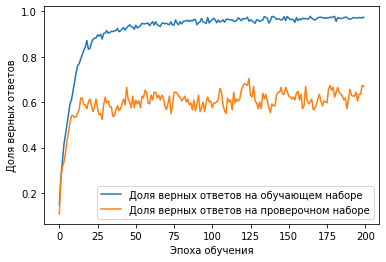

НЕЙРОНКА:  Embedding + двунаправленный LSTM

Дуоденит  распознано  90 % сеть считает, что это  Дуоденит ,  распознано ВЕРНО!
Гастрит  распознано  90 % сеть считает, что это  Гастрит ,  распознано ВЕРНО!
Колит  распознано  45 % сеть считает, что это  Панкреатит ,  распознано НЕ ВЕРНО!
Энтерит  распознано  12 % сеть считает, что это  Панкреатит ,  распознано НЕ ВЕРНО!
Гепатит  распознано  88 % сеть считает, что это  Гепатит ,  распознано ВЕРНО!
Панкреатит  распознано  90 % сеть считает, что это  Панкреатит ,  распознано ВЕРНО!
Язва  распознано  55 % сеть считает, что это  Язва ,  распознано ВЕРНО!
Холицестит  распознано  80 % сеть считает, что это  Холицестит ,  распознано ВЕРНО!
Эзофагит  распознано  52 % сеть считает, что это  Эзофагит ,  распознано ВЕРНО!
Аппендицит  распознано  64 % сеть считает, что это  Аппендицит ,  распознано ВЕРНО!

Средний процент распознавания  66 %



In [ ]:
modelEL = Sequential() #создаём последовательную модель нейросети

#преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
modelEL.add(Embedding(maxWordsCount, 50, input_length=xLen))

modelEL.add(SpatialDropout1D(0.5)) #добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения
modelEL.add(BatchNormalization()) #добавляем слой нормализации данных
modelEL.add(Bidirectional(LSTM(12, return_sequences=1))) #добавляем слой с двунаправленным LSTM, совместимый с Cuda при поддержке GPU
modelEL.add(Bidirectional(LSTM(12, return_sequences=1))) #добавляем слой с двунаправленным LSTM, совместимый с Cuda при поддержке GPU
modelEL.add(Dropout(0.4)) #добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения
modelEL.add(BatchNormalization()) #добавляем слой нормализации данных

modelEL.add(GRU(12, return_sequences=1,reset_after=True)) #добавляем слой GRU, совместимый с Cuda при поддержке GPU
modelEL.add(GRU(12, reset_after=True)) #добавляем слой GRU, совместимый с Cuda при поддержке GPU

modelEL.add(Dropout(0.3)) #добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения
modelEL.add(BatchNormalization()) #добавляем слой нормализации данных
modelEL.add(Dense(100, activation='relu')) #добавляем полносвязный слой с указанием количества нейронов и функции активации
modelEL.add(Dropout(0.3)) #добавляем слой регуляризации, "выключая" указанное количество нейронов, во избежание переобучения
modelEL.add(BatchNormalization()) #добавляем слой нормализации данных
modelEL.add(Dense(10, activation='softmax')) #добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

# Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
modelEL.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть с указанием тренировочной выборки, количества эпох, размера минибатча для подачи сети, и тестовой выборки
history = modelEL.fit(xTrain, 
                    yTrain, 
                    epochs=200,
                    batch_size=10,
                    validation_data=(xTest, yTest))

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

pred = recognizeMultiClass(modelEL, xTest6Classes, "Embedding + двунаправленный LSTM") #функция покажет какие классы и как распознаны верно